<a href="https://colab.research.google.com/github/kalai2315/Copper_Modelling_project/blob/main/copper_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv("/content/Copper_Set.csv")

In [5]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938,25,Won,W,41,0.80,1210.0,104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963,30,Won,WI,28,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26077 entries, 0 to 26076
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             26076 non-null  object 
 1   item_date      26077 non-null  int64  
 2   quantity tons  26077 non-null  float64
 3   customer       26077 non-null  int64  
 4   country        26077 non-null  int64  
 5   status         26077 non-null  object 
 6   item type      26077 non-null  object 
 7   application    26077 non-null  int64  
 8   thickness      26077 non-null  float64
 9   width          26077 non-null  float64
 10  material_ref   14704 non-null  object 
 11  product_ref    26076 non-null  float64
 12  delivery date  26076 non-null  float64
 13  selling_price  26076 non-null  float64
dtypes: float64(6), int64(4), object(4)
memory usage: 2.8+ MB


In [7]:
#converting the datatypes
# item_date, delivery_date, quantity tons

df["quantity tons"]= pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date"]= pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["delivery_date"]= pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date

In [8]:
#quantity tons and selling_price have a negative values, This is impossible,
# so we need to replace the negative values

#converting the negative values into the null values
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [9]:
df.isnull().sum()

id                   1
item_date            1
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref     11373
product_ref          1
delivery date        1
selling_price        3
delivery_date        2
dtype: int64

In [10]:
# object datatype using mode
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery_date'].fillna(df['delivery_date'].mode().iloc[0], inplace=True)

In [36]:
#numerical datatype using median
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)
df['product_ref'].fillna(df['product_ref'].median(), inplace=True)

In [12]:
# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.

df.drop(columns=['id','material_ref','delivery date'], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,1.670799e+09,854.00,2021-07-01
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,1.668702e+09,1047.00,2021-04-01
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,6.283770e+05,644.33,2021-01-01
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,1.668702e+09,768.00,2021-01-01
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,6.406650e+05,577.00,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
26072,2021-03-04,102.335318,30148586,32,Won,W,41,0.74,1220.0,6.119930e+05,1136.00,2021-04-01
26073,2021-03-04,32.029845,30345717,25,Won,W,41,0.45,1250.0,6.119930e+05,1134.00,2021-04-01
26074,2021-03-04,51.267386,30148586,32,Won,W,41,0.74,1220.0,6.119930e+05,1134.00,2021-04-01
26075,2021-03-04,42.917908,30202869,25,Won,S,10,2.00,1000.0,1.332077e+09,947.00,2021-07-01


In [37]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
selling_price      0
delivery_date      0
Date_difference    0
item_day           0
item_month         0
item_year          0
dtype: int64

In [14]:
#remove data points other than WON, LOST STATUS values.
# Filter the DataFrame to keep only 'WON' and 'LOST' status values
df = df[df['status'].isin(['Won', 'Lost'])]
df


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,1.670799e+09,854.00,2021-07-01
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,1.668702e+09,1047.00,2021-04-01
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,6.283770e+05,644.33,2021-01-01
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,1.668702e+09,768.00,2021-01-01
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,6.406650e+05,577.00,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
26072,2021-03-04,102.335318,30148586,32,Won,W,41,0.74,1220.0,6.119930e+05,1136.00,2021-04-01
26073,2021-03-04,32.029845,30345717,25,Won,W,41,0.45,1250.0,6.119930e+05,1134.00,2021-04-01
26074,2021-03-04,51.267386,30148586,32,Won,W,41,0.74,1220.0,6.119930e+05,1134.00,2021-04-01
26075,2021-03-04,42.917908,30202869,25,Won,S,10,2.00,1000.0,1.332077e+09,947.00,2021-07-01


In [15]:
status_mapping = {'Won': 1, 'Lost': 0}

# Map categorical values to numerical values
df['status'] = df['status'].map(status_mapping)

In [16]:
df['status'].unique()

array([1, 0])

In [17]:
df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])

In [18]:
df["item type"].unique()

array([4., 5., 3., 1., 2., 0.])

In [19]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date
0,2021-04-01,54.151139,30156308,28,1,4.0,10,2.00,1500.0,1.670799e+09,854.00,2021-07-01
1,2021-04-01,768.024839,30202938,25,1,4.0,41,0.80,1210.0,1.668702e+09,1047.00,2021-04-01
2,2021-04-01,386.127949,30153963,30,1,5.0,28,0.38,952.0,6.283770e+05,644.33,2021-01-01
3,2021-04-01,202.411065,30349574,32,1,3.0,59,2.30,1317.0,1.668702e+09,768.00,2021-01-01
4,2021-04-01,785.526262,30211560,28,1,4.0,10,4.00,2000.0,6.406650e+05,577.00,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
26072,2021-03-04,102.335318,30148586,32,1,4.0,41,0.74,1220.0,6.119930e+05,1136.00,2021-04-01
26073,2021-03-04,32.029845,30345717,25,1,4.0,41,0.45,1250.0,6.119930e+05,1134.00,2021-04-01
26074,2021-03-04,51.267386,30148586,32,1,4.0,41,0.74,1220.0,6.119930e+05,1134.00,2021-04-01
26075,2021-03-04,42.917908,30202869,25,1,3.0,10,2.00,1000.0,1.332077e+09,947.00,2021-07-01


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,22257.0,1.000941e+02,3.882574e+02,6.677085e-03,1.166741e+01,3.085887e+01,6.782349e+01,1.660327e+04
customer,22257.0,3.023899e+07,7.171976e+04,3.014762e+07,3.019753e+07,3.020617e+07,3.028817e+07,3.040818e+07
country,22257.0,4.404089e+01,2.384179e+01,2.500000e+01,2.700000e+01,3.000000e+01,7.700000e+01,1.130000e+02
status,22257.0,8.621557e-01,3.447442e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
item type,22257.0,3.605428e+00,6.056907e-01,0.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
application,22257.0,2.572283e+01,1.779930e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,22257.0,2.715639e+00,1.695122e+01,1.800000e-01,7.500000e-01,1.710000e+00,3.000000e+00,2.500000e+03
width,22257.0,1.306597e+03,2.536608e+02,1.000000e+00,1.186000e+03,1.250000e+03,1.500000e+03,2.150000e+03
product_ref,22256.0,5.188465e+08,7.372312e+08,6.117280e+05,6.283770e+05,6.406650e+05,1.668702e+09,1.722208e+09
selling_price,22257.0,1.007988e+03,1.593250e+02,5.070000e+02,8.920000e+02,9.820000e+02,1.098000e+03,2.133000e+03


In [21]:
#Identify variable types and distributions
continuous_vars = ['quantity tons', 'thickness', 'width', 'selling_price']
categorical_vars = ['status', 'item_type', 'application',  'product_ref', 'country', 'customer']


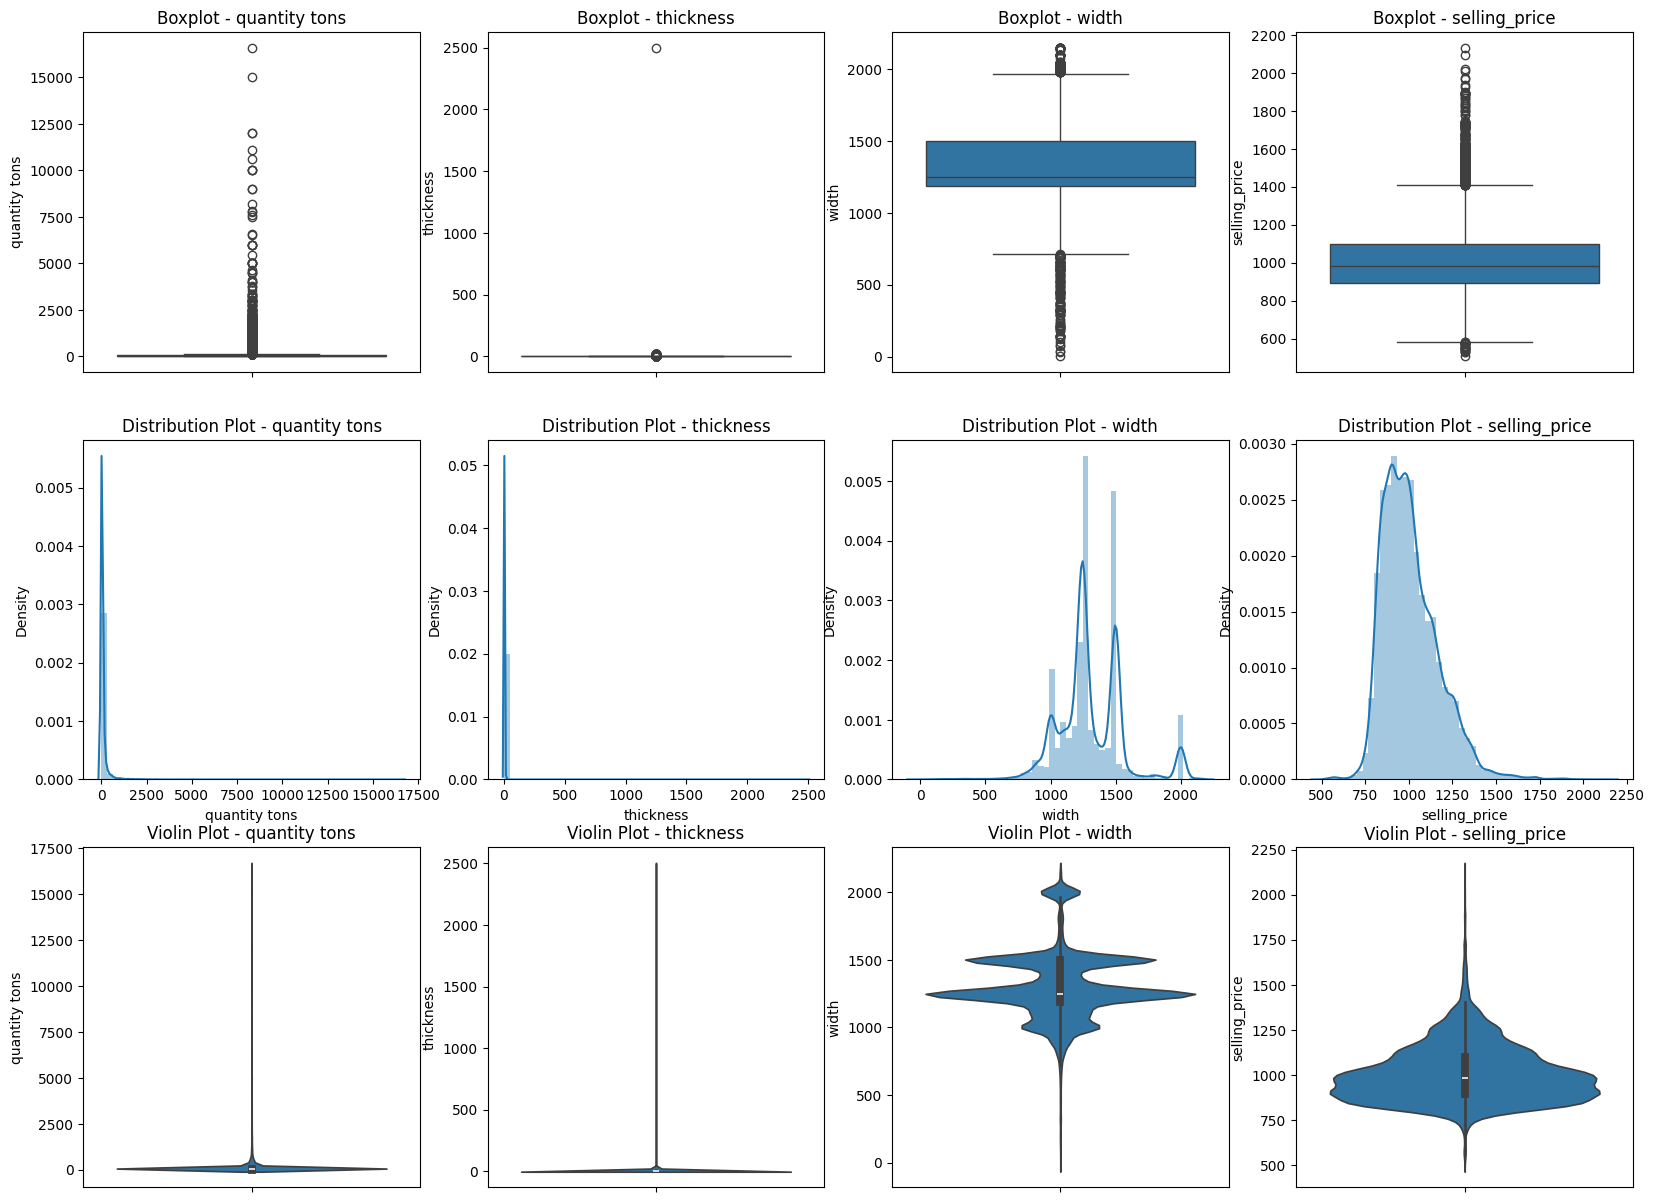

In [22]:
# Create subplots for visualizations
fig, axes = plt.subplots(nrows=3, ncols=len(continuous_vars), figsize=(20, 15))

# Plot boxplots, distribution plots, and violin plots for each numerical variable
for i, col in enumerate(continuous_vars):
    # Before outlier treatment
    sns.boxplot(y=df[col], ax=axes[0,i])
    sns.distplot(df[col], ax=axes[1,i])
    sns.violinplot(y=df[col], ax=axes[2,i])
    axes[0,i].set_title(f'Boxplot - {col}')
    axes[1,i].set_title(f'Distribution Plot - {col}')
    axes[2,i].set_title(f'Violin Plot - {col}')

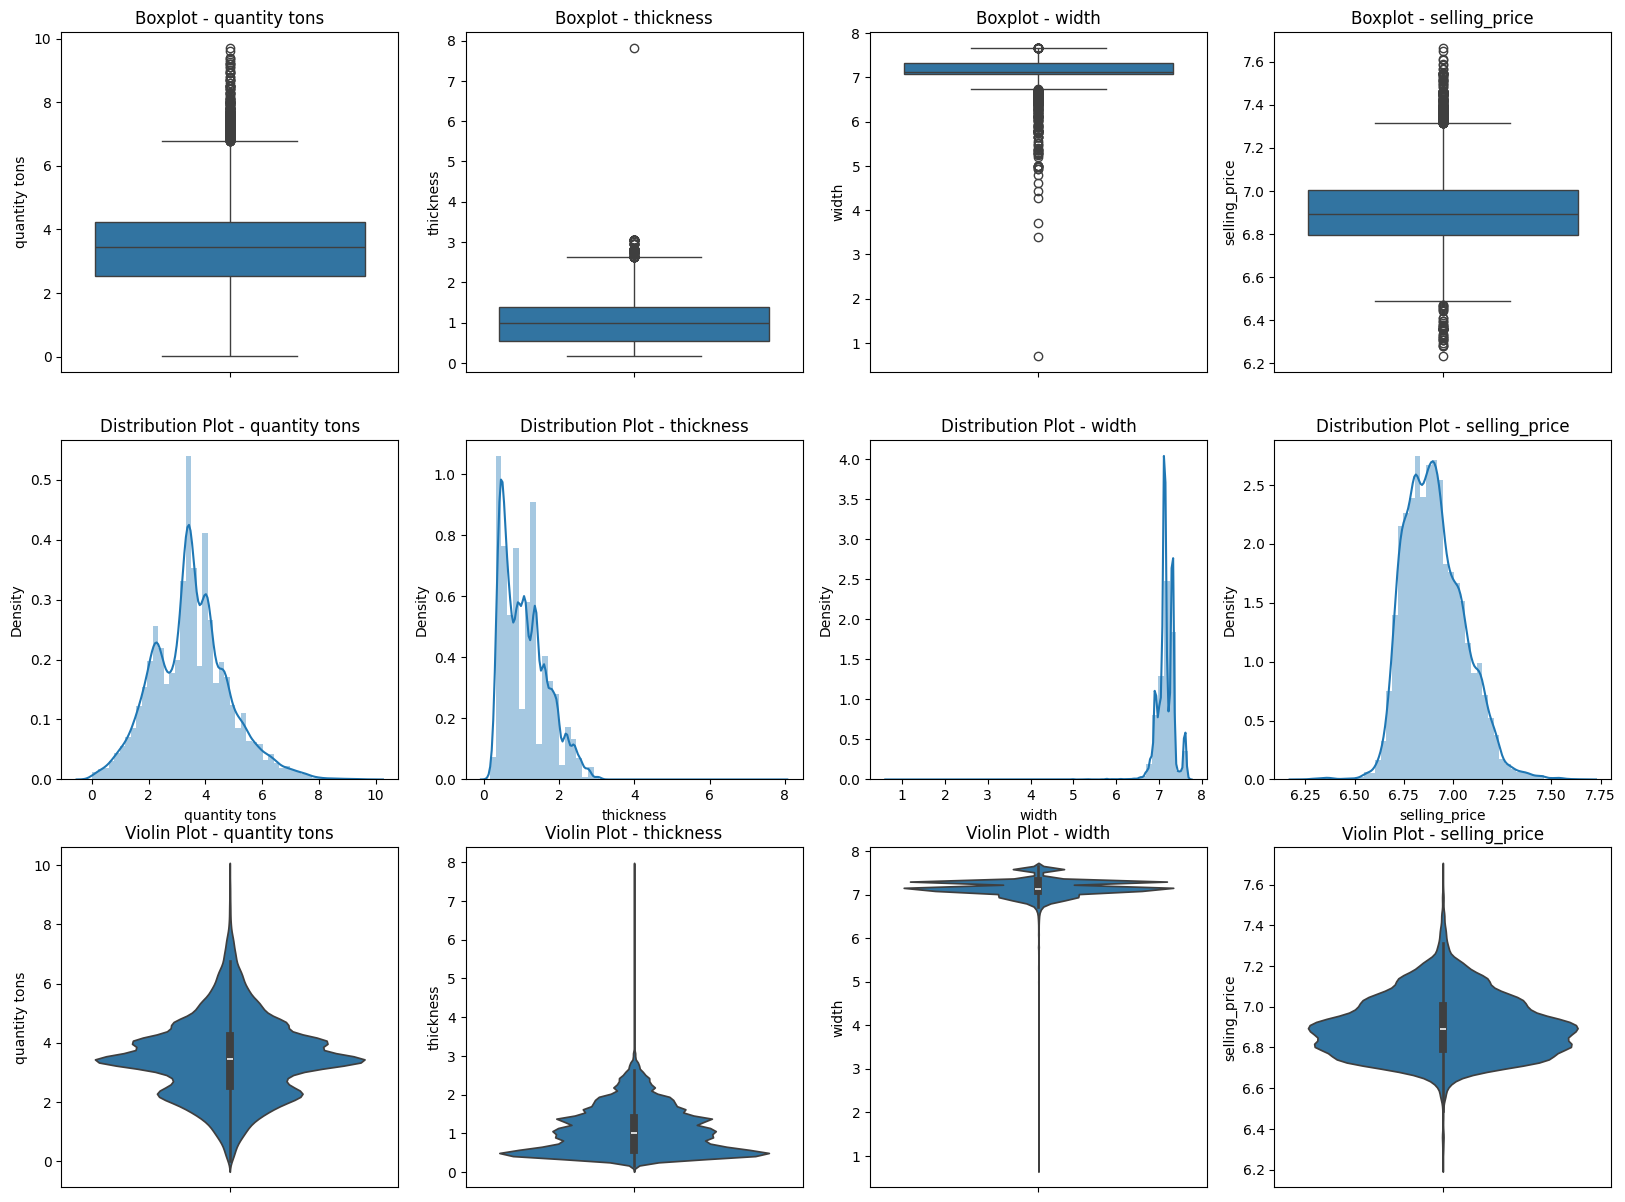

In [23]:
# Apply log transformation to each numerical variable
for col in continuous_vars:
    df[col] = np.log1p(df[col])

# Re-plot the distributions after log transformation
fig, axes = plt.subplots(nrows=3, ncols=len(continuous_vars), figsize=(20, 15))
for i, col in enumerate(continuous_vars):
    sns.boxplot(y=df[col], ax=axes[0,i])
    sns.distplot(df[col], ax=axes[1,i])
    sns.violinplot(y=df[col], ax=axes[2,i])
    axes[0,i].set_title(f'Boxplot - {col}')
    axes[1,i].set_title(f'Distribution Plot - {col}')
    axes[2,i].set_title(f'Violin Plot - {col}')


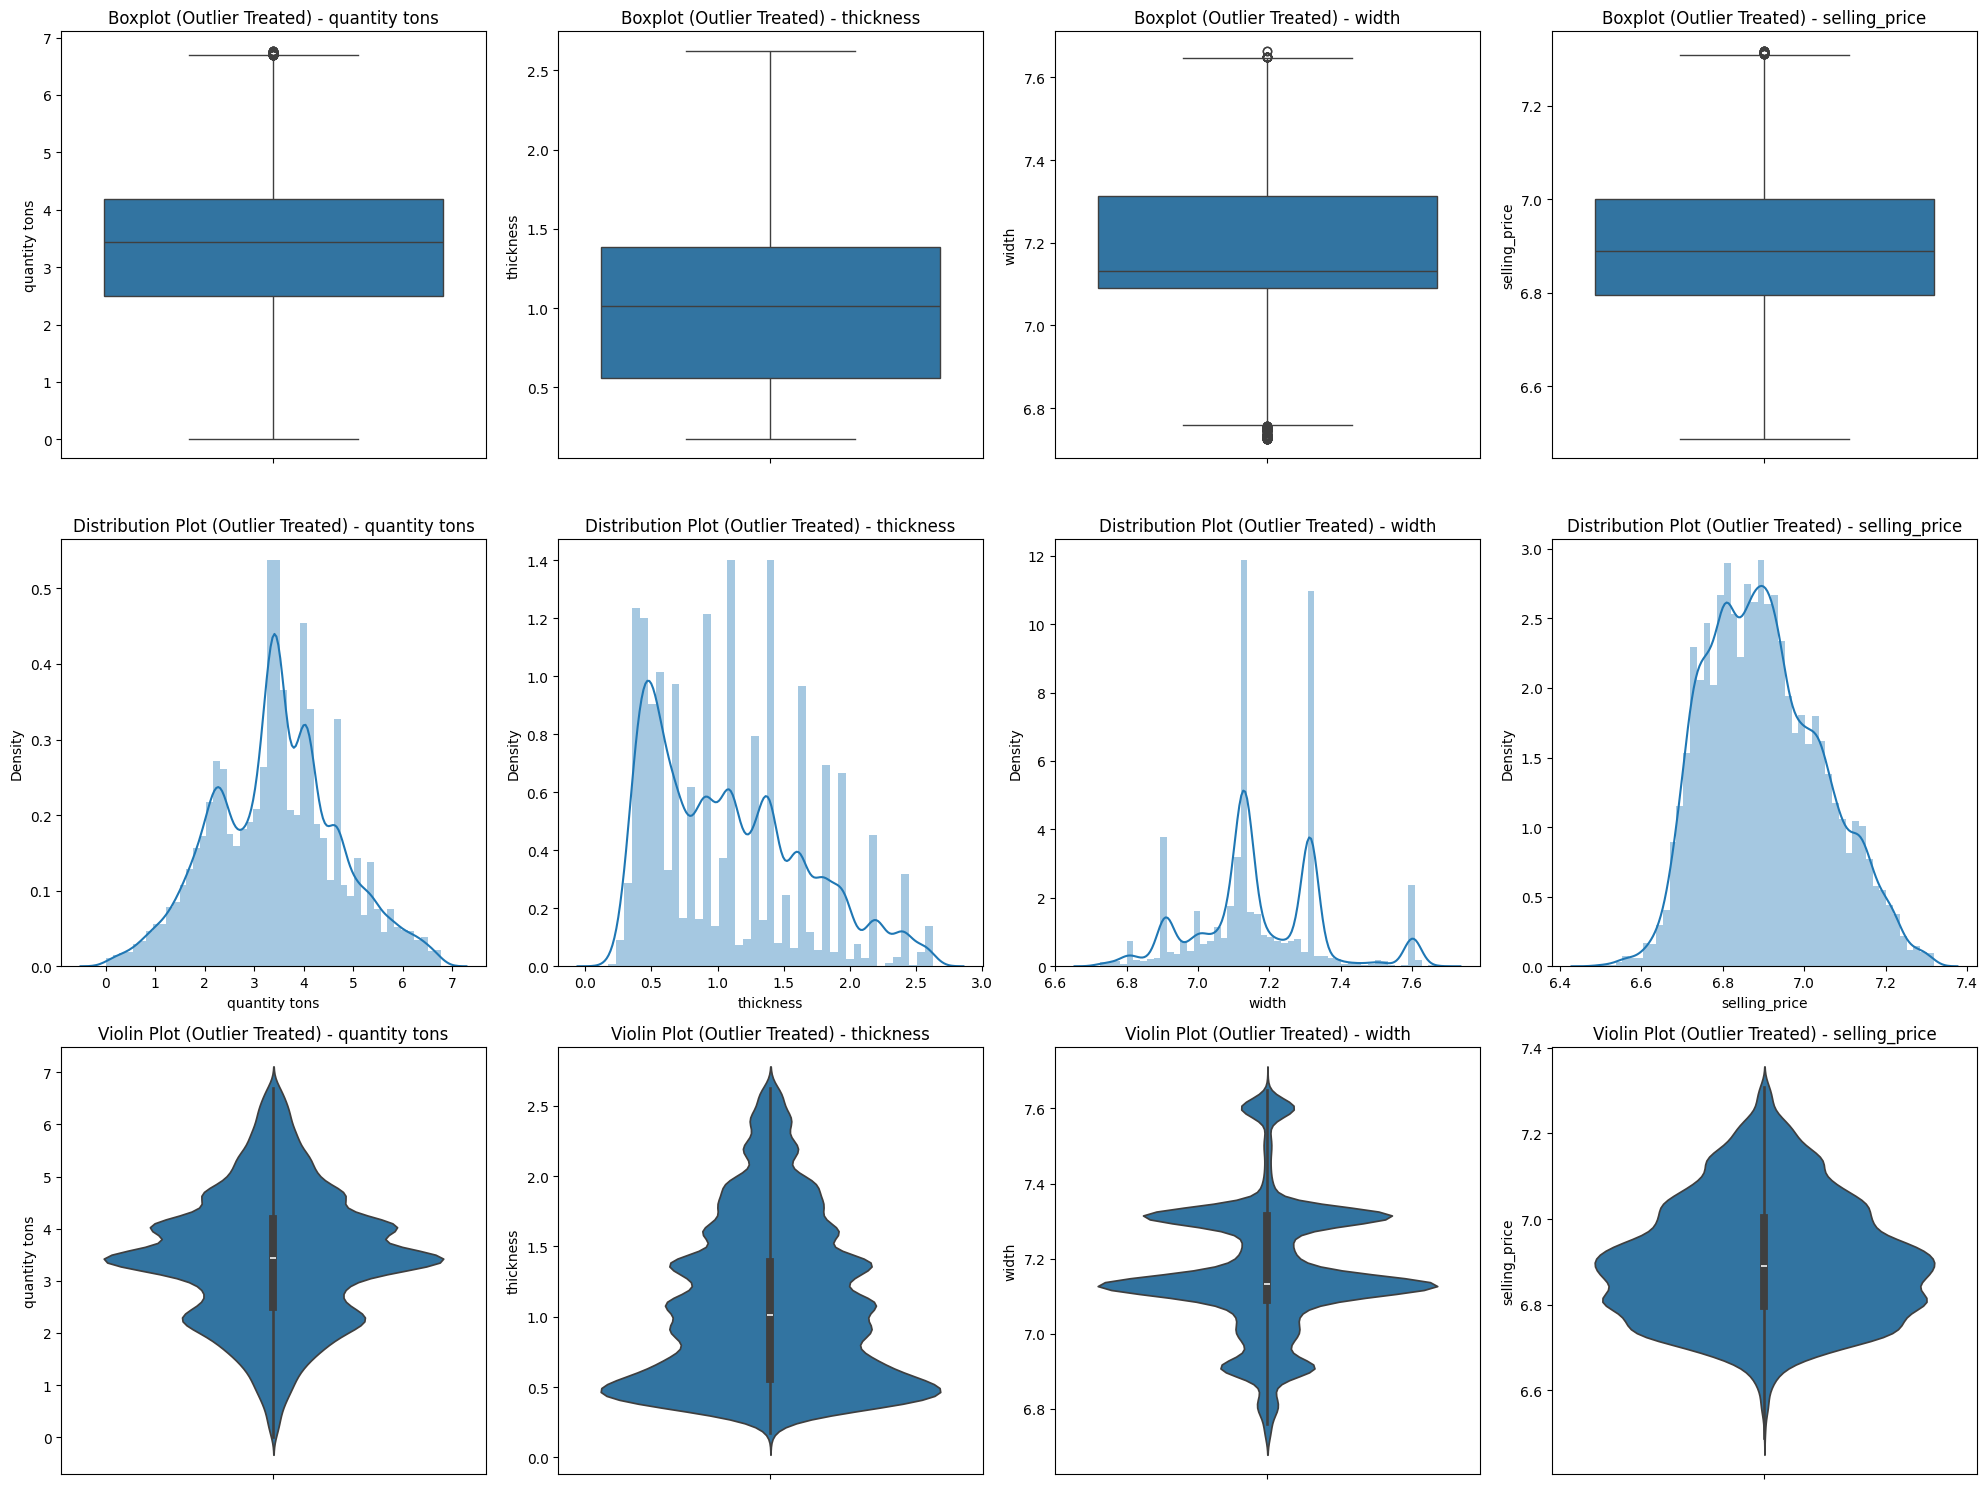

In [24]:
# Outlier treatment using IQR method
def treat_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Create subplots for visualizations
fig, axes = plt.subplots(nrows=3, ncols=len(continuous_vars), figsize=(20, 15))

# Apply outlier treatment using IQR method
df_outlier_treated = treat_outliers_iqr(df.copy(), continuous_vars)

# Plot boxplots, distribution plots, and violin plots for each numerical variable after outlier treatment
for i, col in enumerate(continuous_vars):
    # After outlier treatment
    sns.boxplot(y=df_outlier_treated[col], ax=axes[0,i])
    sns.distplot(df_outlier_treated[col], ax=axes[1,i])
    sns.violinplot(y=df_outlier_treated[col], ax=axes[2,i])
    axes[0,i].set_title(f'Boxplot (Outlier Treated) - {col}')
    axes[1,i].set_title(f'Distribution Plot (Outlier Treated) - {col}')
    axes[2,i].set_title(f'Violin Plot (Outlier Treated) - {col}')

plt.tight_layout()
plt.show()


<Axes: >

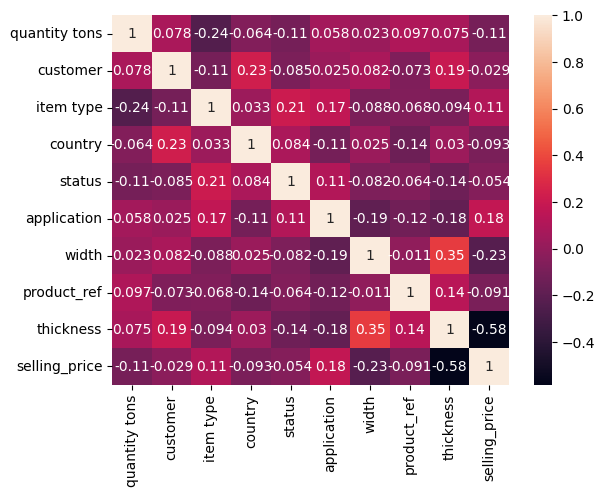

In [25]:
col = ['quantity tons','customer','item type','country','status','application','width','product_ref','thickness','selling_price']
df_heatmap = df[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [26]:
# Convert 'item_date' column to datetime type
df['item_date'] = pd.to_datetime(df['item_date'])

# Convert 'delivery_date' column to datetime type
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

# Calculate the difference in days between 'delivery_date' and 'item_date'
df['Date_difference'] = (df['delivery_date'] - df['item_date']).dt.days


In [27]:
df['Date_difference']

0         91
1          0
2        -90
3        -90
4        -31
        ... 
26072     28
26073     28
26074     28
26075    119
26076    119
Name: Date_difference, Length: 22257, dtype: int64

In [28]:
#split the day, month, and year from the 'item_date' column and add them as separate columns to the DataFrame

df['item_date'] = pd.to_datetime(df['item_date'])
# Extract day, month, and year
df['item_day'] = df['item_date'].dt.day
df['item_month'] = df['item_date'].dt.month
df['item_year'] = df['item_date'].dt.year
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date,Date_difference,item_day,item_month,item_year
0,2021-04-01,4.010077,30156308,28,1,4.0,10,1.098612,7.313887,1.670799e+09,6.751101,2021-07-01,91,1,4,2021
1,2021-04-01,6.645123,30202938,25,1,4.0,41,0.587787,7.099202,1.668702e+09,6.954639,2021-04-01,0,1,4,2021
2,2021-04-01,5.958755,30153963,30,1,5.0,28,0.322083,6.859615,6.283770e+05,6.469762,2021-01-01,-90,1,4,2021
3,2021-04-01,5.315229,30349574,32,1,3.0,59,1.193922,7.183871,1.668702e+09,6.645091,2021-01-01,-90,1,4,2021
4,2021-04-01,6.667626,30211560,28,1,4.0,10,1.609438,7.601402,6.406650e+05,6.359574,2021-03-01,-31,1,4,2021


In [29]:
# Filter non-negative values of 'Date_difference' into one DataFrame
positive_df = df[df['Date_difference'] >= 0].reset_index(drop=True)
positive_df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date,Date_difference,item_day,item_month,item_year
0,2021-04-01,4.010077,30156308,28,1,4.0,10,1.098612,7.313887,1.670799e+09,6.751101,2021-07-01,91,1,4,2021
1,2021-04-01,6.645123,30202938,25,1,4.0,41,0.587787,7.099202,1.668702e+09,6.954639,2021-04-01,0,1,4,2021
2,2021-04-01,5.424027,30202938,25,1,4.0,41,0.916291,7.143618,1.668702e+09,6.891626,2021-04-01,0,1,4,2021
3,2021-04-01,4.249521,30341428,38,1,3.0,10,0.470004,7.151485,1.668701e+09,7.218177,2021-07-01,91,1,4,2021
4,2021-04-01,6.448299,30202938,25,1,4.0,41,0.916291,7.061334,1.668702e+09,6.891626,2021-04-01,0,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21894,2021-03-04,4.637979,30148586,32,1,4.0,41,0.553885,7.107425,6.119930e+05,7.036148,2021-04-01,28,4,3,2021
21895,2021-03-04,3.497412,30345717,25,1,4.0,41,0.371564,7.131699,6.119930e+05,7.034388,2021-04-01,28,4,3,2021
21896,2021-03-04,3.956373,30148586,32,1,4.0,41,0.553885,7.107425,6.119930e+05,7.034388,2021-04-01,28,4,3,2021
21897,2021-03-04,3.782322,30202869,25,1,3.0,10,1.098612,6.908755,1.332077e+09,6.854355,2021-07-01,119,4,3,2021


In [30]:
# Filter negative values of 'Date_difference' into another DataFrame
negative_df = df[df['Date_difference'] < 0].reset_index(drop=True)
negative_df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date,Date_difference,item_day,item_month,item_year
0,2021-04-01,5.958755,30153963,30,1,5.0,28,0.322083,6.859615,6.283770e+05,6.469762,2021-01-01,-90,1,4,2021
1,2021-04-01,5.315229,30349574,32,1,3.0,59,1.193922,7.183871,1.668702e+09,6.645091,2021-01-01,-90,1,4,2021
2,2021-04-01,6.667626,30211560,28,1,4.0,10,1.609438,7.601402,6.406650e+05,6.359574,2021-03-01,-31,1,4,2021
3,2021-04-01,4.739589,30342192,32,1,4.0,41,0.518794,7.107425,6.119930e+05,6.837333,2021-01-01,-90,1,4,2021
4,2021-04-01,4.744894,30342192,32,1,4.0,41,0.438255,7.107425,6.119930e+05,6.861711,2021-01-01,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2021-03-04,4.688076,30157092,77,1,3.0,41,0.470004,7.003974,6.119930e+05,6.754557,2021-01-01,-62,4,3,2021
354,2021-03-04,4.029108,30157092,77,1,3.0,41,0.336472,6.965080,6.119930e+05,6.893545,2021-01-01,-62,4,3,2021
355,2021-03-04,4.692226,30157092,77,1,3.0,41,0.336472,6.965080,6.119930e+05,6.879726,2021-01-01,-62,4,3,2021
356,2021-03-04,3.997566,30157092,77,1,3.0,41,0.336472,7.131699,6.119930e+05,6.873661,2021-01-01,-62,4,3,2021


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [32]:
positive_df.columns


Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'selling_price', 'delivery_date', 'Date_difference', 'item_day',
       'item_month', 'item_year'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def ml_delivery_date(df, algorithm):
    # Extract features and target variable
    x = df.drop(columns=['item_date', 'delivery_date', 'Date_difference'], axis=1)
    y = df['Date_difference']

    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

    # Initialize and train the model
    model = algorithm().fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Compute evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }


    return metrics


In [39]:
print(ml_delivery_date(positive_df, DecisionTreeRegressor))
print(ml_delivery_date(positive_df, ExtraTreesRegressor))
print(ml_delivery_date(positive_df, RandomForestRegressor))
print(ml_delivery_date(positive_df, AdaBoostRegressor))
print(ml_delivery_date(positive_df, GradientBoostingRegressor))
print(ml_delivery_date(positive_df, XGBRegressor))

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

def predict_negative_date_difference(positive_df, negative_df):
    # Extract features and target variable from positive data
    x_train_positive = positive_df.drop(columns=["item_date", "delivery_date", "Date_difference"])
    y_train_positive = positive_df["Date_difference"]

    # Extract features from negative data (to predict Date_difference)
    x_test_negative = negative_df.drop(columns=["item_date", "delivery_date", "Date_difference"])

    # Train the model using positive data
    model = ExtraTreesRegressor(random_state=42)
    model.fit(x_train_positive, y_train_positive)

    # Make predictions for the negative data
    predicted_values = model.predict(x_test_negative)

    return predicted_values

# Call the function with positive_df and negative_df
predicted_values = predict_negative_date_difference(positive_df, negative_df)

# Display the predicted values
print(predicted_values)


In [ ]:
print(predicted_values.dtype)

float64


In [ ]:
# Convert float values to int
predicted_values = predicted_values.astype(int)

# Display the modified predicted values
print(predicted_values)


[48 77 98 ... 39 37 38]


In [ ]:
negative_df['Date_difference']= pd.DataFrame(predicted_values)

In [ ]:
negative_df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
selling_price      0
delivery_date      0
Date_difference    0
item_day           0
item_month         0
item_year          0
dtype: int64

In [ ]:
def find_delivery_date(item_date, date_difference):
    # Convert item_date to datetime
    item_date = pd.to_datetime(item_date)
    # Calculate delivery date
    delivery_date = item_date + pd.to_timedelta(date_difference, unit='D')
    return delivery_date

# Apply the function to negative_df to calculate the delivery_date
negative_df["delivery_date"] = find_delivery_date(negative_df["item_date"], negative_df["Date_difference"])

# Display the DataFrame with the calculated delivery_date
print(negative_df[['item_date', 'Date_difference', 'delivery_date']])


       item_date  Date_difference delivery_date
0     2021-04-01               48    2021-05-19
1     2021-04-01               77    2021-06-17
2     2021-04-01               98    2021-07-08
3     2021-04-01               64    2021-06-04
4     2021-04-01               66    2021-06-06
...          ...              ...           ...
14651 2020-07-02               39    2020-08-10
14652 2020-07-02               39    2020-08-10
14653 2020-07-02               39    2020-08-10
14654 2020-07-02               37    2020-08-08
14655 2020-07-02               38    2020-08-09

[14656 rows x 3 columns]


In [ ]:
# Concatenate the two DataFrames along the rows
combined_df = pd.concat([positive_df, negative_df], ignore_index=True)

combined_df.tail()


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date,Date_difference,item_day,item_month,item_year
150445,2020-07-02,4.639402,30200854.0,25.0,1,5.0,41.0,0.672944,7.107425,164141591,6.383507,2020-08-10,39,2,7,2020
150446,2020-07-02,5.342748,30200854.0,25.0,1,5.0,41.0,0.667829,7.313887,164141591,6.380123,2020-08-10,39,2,7,2020
150447,2020-07-02,1.655480,30200854.0,25.0,1,5.0,41.0,0.536493,7.131699,164141591,6.429719,2020-08-10,39,2,7,2020
150448,2020-07-02,3.445693,30200854.0,25.0,1,5.0,41.0,0.615186,7.131699,164141591,6.400257,2020-08-08,37,2,7,2020
150449,2020-07-02,6.010499,30200854.0,25.0,1,5.0,41.0,0.536493,7.123673,164141591,6.410175,2020-08-09,38,2,7,2020


In [ ]:
# Extract year, month, and day components from the "delivery_date" column
combined_df['delivery_year'] = combined_df['delivery_date'].dt.year
combined_df['delivery_month'] = combined_df['delivery_date'].dt.month
combined_df['delivery_day'] = combined_df['delivery_date'].dt.day

# Display the DataFrame with the new columns
combined_df.head()


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date,Date_difference,item_day,item_month,item_year,delivery_year,delivery_month,delivery_day
0,2021-04-01,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,7.313887,1670798778,6.751101,2021-07-01,91,1,4,2021,2021,7,1
1,2021-04-01,6.645123,30202938.0,25.0,1,5.0,41.0,0.587787,7.099202,1668701718,6.954639,2021-04-01,0,1,4,2021,2021,4,1
2,2021-04-01,5.424027,30202938.0,25.0,1,5.0,41.0,0.916291,7.143618,1668701718,6.891626,2021-04-01,0,1,4,2021,2021,4,1
3,2021-04-01,4.249521,30341428.0,38.0,1,3.0,10.0,0.470004,7.151485,1668701376,7.218177,2021-07-01,91,1,4,2021,2021,7,1
4,2021-04-01,6.448299,30202938.0,25.0,1,5.0,41.0,0.916291,7.061334,1668701718,6.891626,2021-04-01,0,1,4,2021,2021,4,1


In [ ]:
combined_df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'selling_price', 'delivery_date', 'Date_difference', 'item_day',
       'item_month', 'item_year', 'delivery_year', 'delivery_month',
       'delivery_day'],
      dtype='object')

In [ ]:
combined_df.drop(columns=["item_date","delivery_date","Date_difference"],inplace=True)

In [ ]:
# Save the DataFrame as a CSV file
combined_df.to_csv('combined_data.csv', index=False)


In [ ]:
combined_df=pd.read_csv('/content/combined_data.csv')

In [ ]:
combined_df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_day,item_month,item_year,delivery_year,delivery_month,delivery_day
0,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,7.313887,1670798778,6.751101,1,4,2021,2021,7,1
1,6.645123,30202938.0,25.0,1,5.0,41.0,0.587787,7.099202,1668701718,6.954639,1,4,2021,2021,4,1
2,5.424027,30202938.0,25.0,1,5.0,41.0,0.916291,7.143618,1668701718,6.891626,1,4,2021,2021,4,1
3,4.249521,30341428.0,38.0,1,3.0,10.0,0.470004,7.151485,1668701376,7.218177,1,4,2021,2021,7,1
4,6.448299,30202938.0,25.0,1,5.0,41.0,0.916291,7.061334,1668701718,6.891626,1,4,2021,2021,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150445,4.639402,30200854.0,25.0,1,5.0,41.0,0.672944,7.107425,164141591,6.383507,2,7,2020,2020,8,10
150446,5.342748,30200854.0,25.0,1,5.0,41.0,0.667829,7.313887,164141591,6.380123,2,7,2020,2020,8,10
150447,1.655480,30200854.0,25.0,1,5.0,41.0,0.536493,7.131699,164141591,6.429719,2,7,2020,2020,8,10
150448,3.445693,30200854.0,25.0,1,5.0,41.0,0.615186,7.131699,164141591,6.400257,2,7,2020,2020,8,8


In [ ]:
combined_df.isnull().sum()

quantity tons     0
customer          0
country           0
status            0
item type         0
application       0
thickness         0
width             0
product_ref       0
selling_price     0
item_day          0
item_month        0
item_year         0
delivery_year     0
delivery_month    0
delivery_day      0
dtype: int64

# **Classification method to predict WON or LOST**

In [ ]:
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [ ]:
combined_df["status"].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [ ]:
# Separate features and target variable
X = combined_df.drop(columns=['status'])
y = combined_df['status']

In [ ]:
X.shape,y.shape

((150450, 15), (150450,))

In [ ]:
# Initialize SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Resample the data
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

In [ ]:
X_resampled.shape,y_resampled.shape

((231084, 15), (231084,))

In [ ]:
y_resampled.value_counts()

status
1    115542
0    115542
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def accuracy_checking(x_data, y_data, algorithm):
    # Train-test splitting
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = algorithm().fit(x_train, y_train)

    # Make predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Compute accuracy scores
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    # Store metrics in a dictionary
    metrics = {
        "Algorithm": algorithm.__name__,
        "Accuracy_Train": accuracy_train,
        "Accuracy_Test": accuracy_test
    }

    return metrics


In [ ]:
print(accuracy_checking(X,y,DecisionTreeClassifier))
print(accuracy_checking(X,y,RandomForestClassifier))
print(accuracy_checking(X,y,ExtraTreesClassifier))
print(accuracy_checking(X,y,AdaBoostClassifier))
print(accuracy_checking(X,y,GradientBoostingClassifier))
print(accuracy_checking(X,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9523762047191758}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9713526088401462}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9757062146892655}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8151379195746095, 'Accuracy_Test': 0.8130940511797939}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8367896311066799, 'Accuracy_Test': 0.8349285476902626}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.946095048188767, 'Accuracy_Test': 0.9326354270521768}


In [ ]:
print(accuracy_checking(X_resampled,y_resampled,DecisionTreeClassifier))
print(accuracy_checking(X_resampled,y_resampled,RandomForestClassifier))
print(accuracy_checking(X_resampled,y_resampled,ExtraTreesClassifier))
print(accuracy_checking(X_resampled,y_resampled,AdaBoostClassifier))
print(accuracy_checking(X_resampled,y_resampled,GradientBoostingClassifier))
print(accuracy_checking(X_resampled,y_resampled,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9656403487894065}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9829716338143973}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9865201116472294}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7657667404133782, 'Accuracy_Test': 0.7658437371529957}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8115455976458752, 'Accuracy_Test': 0.8097236947443581}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9528309541454126, 'Accuracy_Test': 0.9474219443062076}


Extra Trees Classifier stands out with the highest accuracy on the testing data, reaching around 98.7%. . However,  Random Forest Classifier is also a strong contender, offering slightly lower but still impressive accuracy at around 98.3%.
Moreover, Random Forest Classifier offers a good balance between simplicity, interpretability, and performance.







In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the hyperparameters grid
parameters = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [2, 4, 6],
    "max_features": ['sqrt', 'log2']
}

# Initialize GridSearchCV with RandomForestClassifier
gridsearch = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5,n_jobs=-1)

# Fit the grid search to the training data
gridsearch.fit(x_train, y_train)

# Get the best parameters
best_params = gridsearch.best_params_

# Print the best parameters
print("Best Parameters:", best_params)



Best Parameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
